# Entry 30 - Improve Performance - Learning Curves

Learning curves can help determine what avenues to pursue if a model isn't up to expectations, or worse, is completely unusable. They can also be used to determine whether the training and test datasets are suitably represented.

## The Problem

There are several areas to explore when working to improve model performance. Some of these are:

- Get more training data
- Use fewer features
- Engineer new features
- Add polynomials of already existing features
- Decrease $\lambda$
- Increase $\lambda$

Each of these options can be time consuming to explore and implement, so having a way to narrow down what to work on can be extremely helpful. Many times, the direction to pursue can be identified by understanding if the model has overfit or underfit the data. As a reminder:

- Underfiting
  - Model generalizes too much and cannot capture trends/patterns
  - Model is too simple and has low predictive power on both training and test data
  - Example: model with a single feature where the feature cannot predict the target (see the "high bias" example)
- Overfitting
  - Model fits too closely or exactly to the training data
  - Model is too complex and cannot generalize to unseen data (i.e., test data)
  - Example: model just memorizes the answers from the training data (see the "high variance" example)
  
For more on underfitting and overfitting, see [Entry 17](https://julielinx.github.io/blog/17_resampling/).

## The Options

Learning curves are a very useful tool. They can be used to quickly understand if the model is struggling with high bias (underfitting) or high variance (overfitting).

*Note*, code for the three learning curve charts was adapted from the code in the [online appendix of the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Learning-Curve)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Learning Curve')

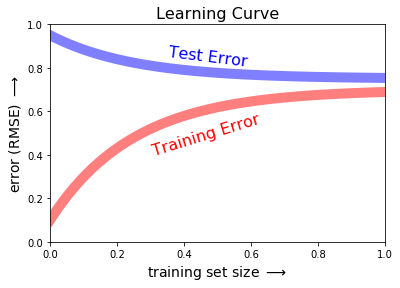

In [92]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(N, y1, lw=10, alpha=0.5, color='blue')
ax.plot(N, y2, lw=10, alpha=0.5, color='red')

ax.text(0.35, 0.81, "Test Error", rotation=-7, size=16, color='blue')
ax.text(0.3, 0.4, "Training Error", rotation=17, size=16, color='red')

# ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
# ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'error (RMSE) $\longrightarrow$', size=14)

ax.set_title("Learning Curve", size=16)

## Bias and Variance

Andrew Ng provides good basic information on what to expect from models with high bias vs those with high variance in his [Machine Learning course](https://www.coursera.org/learn/machine-learning) "Video: Learning Curves" lecture of week 6.

For a refresher on bias, variance, and regression scoring methods see [Entry 21](https://julielinx.github.io/blog/21_reg_score_theory/).

### High bias

In cases with high bias, the model simply doesn't fit the data well. Such as a simple linear model being fit to a logarithmic curve.

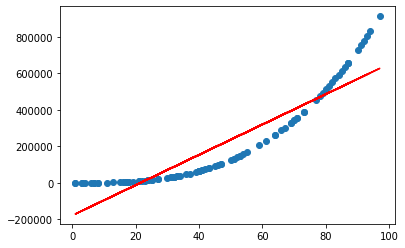

In [133]:
line_X2 = np.around(np.random.rand(100, 1) * 100, 0)
line_y2 = np.around(line_X2**3)

lin_reg2 = LinearRegression()
lin_reg2.fit(line_X2, line_y2)

plt.scatter(line_X2, line_y2)
plt.plot(line_X2, lin_reg2.coef_[0]*line_X2 + lin_reg2.intercept_, color='red')

The model has fit the data as well as can be reasonably expected, so the train error and test error come close to convergence. However, the error will be high.

Text(0.5, 1.0, 'Learning Curve - High Bias')

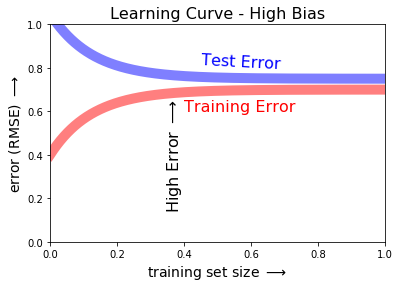

In [214]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.3 * np.exp(-8 * N)
y2 = 0.7 - 0.3 * np.exp(-8 * N)

fig, ax = plt.subplots()
ax.plot(N, y1, lw=10, alpha=0.5, color='blue')
ax.plot(N, y2, lw=10, alpha=0.5, color='red')

ax.text(0.45, 0.8, "Test Error", rotation=-3, size=16, color='blue')
ax.text(0.4, 0.6, "Training Error", size=16, color='red')

ax.text(0.4, 0.4, r'High Error $\longrightarrow$', size=16, rotation=90, ha='right', va='center')
# ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'error (RMSE) $\longrightarrow$', size=14)

ax.set_title("Learning Curve - High Bias", size=16)

In these cases, additional training data won't improve model performance because the model has learned all it can from the non-linear data.

### High variance

In cases with high variance, the model overfits the data, which can become exacerbated with additional training data.

<img src="../img/high_variance.png">

Since the model is overfit, the training error will be low and relatively flat. However, the test error will remain high and there will be a large gap between the training error and test error.

Text(0.5, 1.0, 'Learning Curve - High Variance')

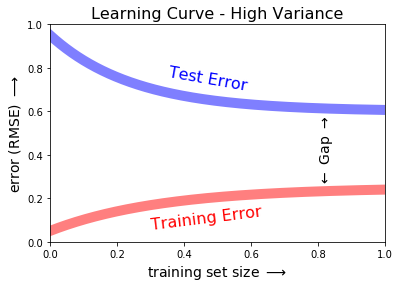

In [178]:
N = np.linspace(0, 1, 1000)
y1 = 0.6 + 0.35 * np.exp(-4 * N)
y2 = 0.25 - 0.2 * np.exp(-3 * N)

fig, ax = plt.subplots()
ax.plot(N, y1, lw=10, alpha=0.5, color='blue')
ax.plot(N, y2, lw=10, alpha=0.5, color='red')

ax.text(0.35, 0.7, "Test Error", rotation=-10, size=16, color='blue')
ax.text(0.3, 0.06, "Training Error", rotation=7, size=16, color='red')

ax.text(0.85, 0.42, r'$\leftarrow$ Gap $\rightarrow$', size=14, rotation=90, ha='right', va='center')
# ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'error (RMSE) $\longrightarrow$', size=14)

ax.set_title("Learning Curve - High Variance", size=16)

## The Proposed Solution

While these rules of thumb don't hold true for every case, following these guidelines will help decide what areas to focus on to improve model performance.

### High Bias

For models suffering from high bias, productive avenues to pursue include:

- Add new features
- Add polynomials of already existing features
- Decrease $\lambda$

### High Variance

For models suffering from high variance, productive avenues to pursue include:

- Get more training data
- Smaller set of features
- Increase $\lambda$

## The Fail

The above charts are beautiful, and the theory from the *Machine Learning course* on how to identify high bias vs high variance is laid out very intuitively. However, per usual, the real data didn't conform to the pretty theory.

Where did I turn when I got these incomprehensible results? Jason BrownLee of [Machine Learning Mastery](https://machinelearningmastery.com/) of course!

I started at the beginning of his [Learning Curves](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) post and almost immediately found some interesting information about applied learning curves: the metric used can be minimizing or maximizing. This explained why the learning curves in [Hands-On Machine Learning](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) and the *Machine Learning course* look one way and the charts in *Python Data Science Handbook* look another way. In the first case, they were using a minimzing function (RMSE; where the aim is to get as low a value as possible). In the second case, he was using a maximizing function (the score; where the aim is the get the value as high as possible. Side note, there is a [function in Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve) `sklearn.model_selection.learning_curve` that will generate the learning curve and it also uses a maximizing function - generally the default scoring method of the underlying algorithm).

## Bias and Variance

Okay, let's try this again.

### High Bias

High bias (underfitting) can be identified just from the training learning curve.

My attempts at using Linear Regression on the `house_16H` dataset from openml look like a good example of this. The unscaled version is all over the place at the beginning, but even after scaling the features, the RMSE settled in around 40,000. These results indicate that a linear model probably isn't the best choice.

Jason pointed out another case where the model is underfit, but that *more* data is needed (remember, when data is underfit, Andrew Ng stated that most of the time, more data won't help). In this case, the learning curve for the training data continues to slope downward.

Notice in Jason's example, that there are only 50 samples. This gives a strong indicator as to why the loss function hasn't evened out: the model hasn't trained on enough data to converge on an answer. Jason puts it succintly in his post:

> This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.

I.E., when you encounter this, get more data.

<img src='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Requires-Further-Training.png'>

### High Variance

Jason lists the two criteria of overfitting on a learning curve as:

- The plot of training loss continues to decrease with experience
- The plot of validation loss decreases to a point and begins increasing again

<img src='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png'>

### Other

In Jason's High Variance example, I find it interesting how much more variation there is in the curves (the lines are squiggly instead of smooth). I noticed this because of the high variability in the learning "curve" for the Boston dataset in my accompanying notebook. There is a spike in RMSE in the examples from around 70 to around 110. This "curve" is very atypical compared to the theory and examples in all of my resources.

In attempting to reconsile this phenomenon with high bias vs high variace, it occurred to me that there is a different most likely explanation. Drastic changes in the score of a model can be due to the subsample of examples it's trained on. I talk about this in the Stratification section of [Entry 17](https://julielinx.github.io/blog/17_resampling/).

A possible culprit on the Boston dataset would be if there was a section of outlier prices. The model would train well at the start when there was a mixture of prices. Then when it hit the subset of outliers, let's say all super expensive houses, that would significantly change the model's predictions - in an undesirable way. Once the training examples return to the normal mixture, the predictions return to their former performance.

Including a cross validation component to my implementation of the learning curves may reduce or remove this condition. However, this feels like something that's good to know. When I start working on improving models, I'll want to know how sensitive a model is to the training examples. Having results like this in the learning curve will tell me this information and I can try different data splitting methods to control it.

### Resources

- [Learning Curves - online appendix of the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Learning-Curve)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Machine Learning course](https://www.coursera.org/learn/machine-learning)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
- [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)
- [sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve)